In [1]:
import pandas as pd

reviews_with_foods = pd.read_csv('reviews_with_foods.csv')

reviews_with_foods.head()

,user_id,recipe_id,date,rating,review,foods
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,"{'cayenne pepper', 'shake', 'low fat sour crea..."
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",{'cumin'}
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,{'chips'}
3,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",{'black pepper'}
4,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i b...,"{'cake', 'raspberry'}"


In [3]:
reviews_with_foods.tail()

,user_id,recipe_id,date,rating,review,foods
23514,181781,181821,2012-05-15,5,Pretty darn good for mostly canned ingredients...,{'bacon'}
23515,122993,229657,2007-05-29,5,Great side dish! Served this with pit bbq'd de...,"{'cornbread', 'venison', 'baked bean'}"
23516,22995,248627,2008-02-03,5,My first attempt at homemade jam was a success...,"{'fruit jam', 'frozen strawberries'}"
23517,1816970,248627,2011-02-04,5,The nicest jam i have ever tried. Thank you.!,{'fruit jam'}
23518,2295913,248627,2012-06-16,0,"This is an recipe for very sweet, old fashione...","{'pectin', 'tap water', 'fruit jam'}"


In [2]:
reviews_with_foods.review[342]

'This was very good and light tasting!  I didn&#039;t use the sriracha but otherwise followed the recipe.  I did take threeovens&#039; advice and pan seared the chicken a little, made it look and taste amazing.  Will make this again!  Made for PRMR.'

In [3]:
reviews_with_foods.foods[342]

"{'sriracha', 'chicken'}"

In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [5]:
# extract verbs

def extract_verbs(text):
    doc = nlp(text)
    verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    return verbs

reviews_with_foods['verbs'] = reviews_with_foods.review.apply(extract_verbs)

In [6]:
# get all unique verbs from all reviews

all_verbs = []

for verbs in reviews_with_foods.verbs:
    all_verbs.extend(verbs)

all_verbs = list(set(all_verbs))

len(all_verbs)

3377

In [7]:
all_verbs

['rock',
 'scoop',
 'mold',
 'swear',
 'baggie',
 'fruitsauce',
 'tear',
 'atleast',
 'thaught',
 'cringe',
 'quick',
 'split',
 'confide',
 'siightseee',
 'grapesee',
 'oven',
 'greet',
 'vocalize',
 'transform',
 'mallow',
 'wanna',
 'bind',
 'cream',
 'infiuse',
 'cod',
 'team',
 'suspend',
 'ommitte',
 'posit',
 'bastardize',
 'risk',
 'they&#039;re',
 'can',
 'struggle',
 'refigerate',
 'rye',
 'tighten',
 'write',
 'walk',
 'google',
 'mmake',
 'realise',
 'die',
 'stringy',
 'share',
 'chuck',
 'nibble',
 'flake',
 'pull',
 'revise',
 'scorch',
 'char',
 'plump',
 'again!serve',
 'reread',
 'season',
 'link',
 'refrigerate',
 'sautée',
 'disrupt',
 'prompt',
 'cheese-',
 'caesar',
 'blender',
 'pop',
 'salad.&lt;br/&gt;&lt;br/&gt;the',
 'sum',
 'presume',
 'unrefine',
 'wth',
 'herbe',
 'more',
 'brownish',
 'pineapple',
 'subsitute',
 'paprika)to',
 'dump',
 'touch',
 'broke',
 'suffer',
 'dispose',
 'forward',
 'awe',
 'assail',
 'comlemente',
 'gobble',
 'dehydrate',
 'goya',

In [8]:
from fuzzywuzzy import fuzz

# Define a function to check if a word is similar to "substitute"
def is_similar(word):
    similarity = fuzz.ratio(word.lower(), "substitute")
    return similarity

In [9]:
for verb in all_verbs:
    if is_similar(verb) > 70:
        print(verb, is_similar(verb))

subsitute 95
subside 71
substitude 90
substitue 95
substantiate 73
substute 89
subtitle 78
substatute 90
sustitute 95
substutute 90
susitute 89
subsituite 90
substitiute 95
substitite 90
substite 89
substitution- 78
substitute 100
subitte 82


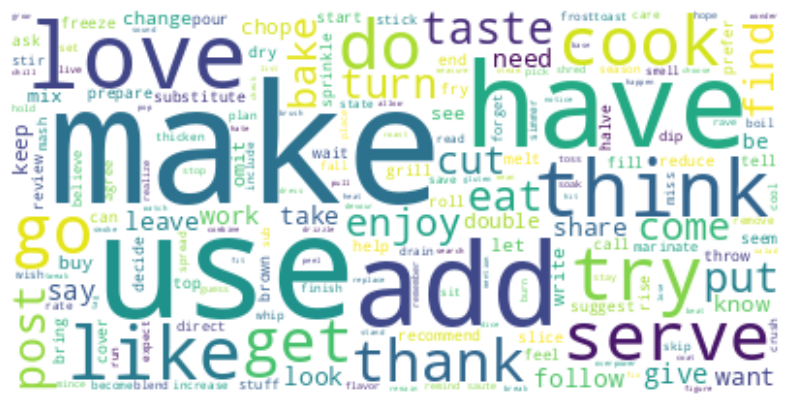

In [10]:
# make a word cloud with count of all verbs

verbs_count = {}

for verbs in reviews_with_foods.verbs:
    for verb in verbs:
        if verb in verbs_count:
            verbs_count[verb] += 1
        else:
            verbs_count[verb] = 1


from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate_from_frequencies(frequencies=verbs_count)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
# show 20 most common verbs

sorted_verbs = sorted(verbs_count.items(), key=lambda x: x[1], reverse=True)

sorted_verbs[:20]

[('make', 21279),
 ('use', 16025),
 ('have', 10052),
 ('add', 9239),
 ('love', 5660),
 ('think', 3906),
 ('try', 3252),
 ('like', 3225),
 ('do', 2829),
 ('serve', 2822),
 ('go', 2650),
 ('cook', 2575),
 ('get', 2498),
 ('thank', 2369),
 ('taste', 2282),
 ('post', 2231),
 ('eat', 2112),
 ('put', 2038),
 ('find', 1941),
 ('turn', 1913)]

In [12]:
all_verbs

['rock',
 'scoop',
 'mold',
 'swear',
 'baggie',
 'fruitsauce',
 'tear',
 'atleast',
 'thaught',
 'cringe',
 'quick',
 'split',
 'confide',
 'siightseee',
 'grapesee',
 'oven',
 'greet',
 'vocalize',
 'transform',
 'mallow',
 'wanna',
 'bind',
 'cream',
 'infiuse',
 'cod',
 'team',
 'suspend',
 'ommitte',
 'posit',
 'bastardize',
 'risk',
 'they&#039;re',
 'can',
 'struggle',
 'refigerate',
 'rye',
 'tighten',
 'write',
 'walk',
 'google',
 'mmake',
 'realise',
 'die',
 'stringy',
 'share',
 'chuck',
 'nibble',
 'flake',
 'pull',
 'revise',
 'scorch',
 'char',
 'plump',
 'again!serve',
 'reread',
 'season',
 'link',
 'refrigerate',
 'sautée',
 'disrupt',
 'prompt',
 'cheese-',
 'caesar',
 'blender',
 'pop',
 'salad.&lt;br/&gt;&lt;br/&gt;the',
 'sum',
 'presume',
 'unrefine',
 'wth',
 'herbe',
 'more',
 'brownish',
 'pineapple',
 'subsitute',
 'paprika)to',
 'dump',
 'touch',
 'broke',
 'suffer',
 'dispose',
 'forward',
 'awe',
 'assail',
 'comlemente',
 'gobble',
 'dehydrate',
 'goya',

In [13]:
reviews_with_foods.head()

,user_id,recipe_id,date,rating,review,foods,verbs
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,"{'cayenne pepper', 'shake', 'low fat sour crea...","[cook, add, use]"
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",{'cumin'},"[double, forget, remain, love, notice]"
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,{'chips'},"[work, use]"
3,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",{'black pepper'},"[make, add]"
4,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i b...,"{'cake', 'raspberry'}","[wait, buy, add, go, add, fill, take]"


In [22]:
all_verbs

['rock',
 'scoop',
 'mold',
 'swear',
 'baggie',
 'fruitsauce',
 'tear',
 'atleast',
 'thaught',
 'cringe',
 'quick',
 'split',
 'confide',
 'siightseee',
 'grapesee',
 'oven',
 'greet',
 'vocalize',
 'transform',
 'mallow',
 'wanna',
 'bind',
 'cream',
 'infiuse',
 'cod',
 'team',
 'suspend',
 'ommitte',
 'posit',
 'bastardize',
 'risk',
 'they&#039;re',
 'can',
 'struggle',
 'refigerate',
 'rye',
 'tighten',
 'write',
 'walk',
 'google',
 'mmake',
 'realise',
 'die',
 'stringy',
 'share',
 'chuck',
 'nibble',
 'flake',
 'pull',
 'revise',
 'scorch',
 'char',
 'plump',
 'again!serve',
 'reread',
 'season',
 'link',
 'refrigerate',
 'sautée',
 'disrupt',
 'prompt',
 'cheese-',
 'caesar',
 'blender',
 'pop',
 'salad.&lt;br/&gt;&lt;br/&gt;the',
 'sum',
 'presume',
 'unrefine',
 'wth',
 'herbe',
 'more',
 'brownish',
 'pineapple',
 'subsitute',
 'paprika)to',
 'dump',
 'touch',
 'broke',
 'suffer',
 'dispose',
 'forward',
 'awe',
 'assail',
 'comlemente',
 'gobble',
 'dehydrate',
 'goya',

In [24]:
len(all_verbs)

3377

In [28]:
# read all verbs from a file

with open('all_verbs.txt', 'r', encoding="utf-8") as f:
    all_verbs = f.read().splitlines()

len(all_verbs)

2863

In [55]:
whitelisted = ["substitute", "replace", "swap", "change", "alternate", "add", "remove", "omit", "switch", "reciprocate"]

# check if a verb is in the whitelist or is similar to a word in the whitelist

from fuzzywuzzy import fuzz

def is_whitelisted(verb):

    if verb in whitelisted:
        return True

    for whitelisted_verb in whitelisted:
        similarity = fuzz.ratio(verb.lower(), whitelisted_verb.lower())
        if similarity > 80:
            return True

    return False

filtered_verbs = []

for verb in all_verbs:

    if is_whitelisted(verb):
        filtered_verbs.append(verb)

len(filtered_verbs)

26

In [56]:
filtered_verbs

['add',
 'alternate',
 'chance',
 'change',
 'charge',
 'exchange',
 'omit',
 'place',
 'remove',
 'replace',
 'snitch',
 'subitte',
 'subsituite',
 'subsitute',
 'substatute',
 'substite',
 'substitite',
 'substitiute',
 'substitude',
 'substitue',
 'substitute',
 'substute',
 'substutute',
 'susitute',
 'sustitute',
 'swap']

In [57]:
reviews_with_foods = pd.read_csv('reviews_with_foods_and_verbs.csv')

In [58]:
reviews_with_foods.head()

,user_id,recipe_id,date,rating,review,foods,verbs
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,"{'cayenne pepper', 'shake', 'low fat sour crea...","['cook', 'add', 'use']"
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",{'cumin'},"['double', 'forget', 'remain', 'love', 'notice']"
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,{'chips'},"['work', 'use']"
3,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",{'black pepper'},"['make', 'add']"
4,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i b...,"{'cake', 'raspberry'}","['wait', 'buy', 'add', 'go', 'add', 'fill', 't..."


In [59]:
def str_to_list(text):
    return text[1:-1].replace("'", "").split(", ")

reviews_with_foods.verbs = reviews_with_foods.verbs.apply(str_to_list)

In [60]:
reviews_with_foods.head()

,user_id,recipe_id,date,rating,review,foods,verbs
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,"{'cayenne pepper', 'shake', 'low fat sour crea...","[cook, add, use]"
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",{'cumin'},"[double, forget, remain, love, notice]"
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,{'chips'},"[work, use]"
3,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",{'black pepper'},"[make, add]"
4,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i b...,"{'cake', 'raspberry'}","[wait, buy, add, go, add, fill, take]"


In [61]:
# filter dataframe to only include reviews with filtered verbs

reviews_with_foods_filtered = reviews_with_foods[reviews_with_foods.verbs.apply(lambda x: any([verb in filtered_verbs for verb in x]))]

len(reviews_with_foods_filtered)

8449

In [62]:
reviews_with_foods_filtered.head()

,user_id,recipe_id,date,rating,review,foods,verbs
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,"{'cayenne pepper', 'shake', 'low fat sour crea...","[cook, add, use]"
3,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",{'black pepper'},"[make, add]"
4,52282,120345,2005-05-21,4,very very sweet. after i waited the 2 days i b...,"{'cake', 'raspberry'}","[wait, buy, add, go, add, fill, take]"
6,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...,"{'sugar', 'raspberry'}","[start, add, have, go, buy, make, make, make, ..."
11,136726,197160,2006-11-25,5,I used this mix to make meat balls.Very simple...,"{'garlic', 'sub sandwich', 'cheese', 'sauces',...","[use, make, put, make, put, find, have, add, t..."


In [63]:
reviews_with_foods_filtered.review[4]

"very very sweet. after i waited the 2 days i bought 2 more pints of raspberries and added them to the mix. i'm going to add some as a cake filling today and will take a photo."

In [64]:
# save dataframe to csv

reviews_with_foods_filtered.to_csv('reviews_with_foods_and_filtered_verbs.csv', index=False)

In [31]:
# write all verbs to a file

with open('all_verbs.txt', 'w', encoding='utf-8') as f:
    for verb in all_verbs:
        f.write(verb + '\n')